### Endemic equilibrium and sensitibity analysis for the within-host system

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import style

# using the style for the plot
plt.style.use('seaborn-v0_8-bright')

### Code chunk 1: Model parameters 
The parameters are given in a vector with form

$params = (\Lambda_T, \beta_{WH}, d, k, \delta, p, c)$

In [2]:
# Dengue virus
paramsDENV = np.array([590, 1.0e-4, 0.03, 4, 2.5, 50, 13])

# Zika virus
paramsZIKV = np.array([159, 2e-5, 0.03, 4, 3.5, 1000, 10])

# West-nile virus
paramsWNV = np.array([4020, 4e-4, 0.03, 3, 23.03, 57.88 , 44.43])


### Code chunk 2: The endemic equilibrium
Here, we aim to plot the within-host endemic equilibrium as a function of the within-host reproduction number and 
the population level infection. 

From the analysis in the main text, we have the following analytical expression 
\begin{equation}
V^{*}(i_M) = \frac{1}{2}\left(\dfrac{d}{\beta_{WH}}(R_{w} -1) + \dfrac{g_H(i_M)}{c} + \sqrt{\left(\dfrac{d}{\beta_{WH}}(R_{w} -1) + \dfrac{g_H(i_M)}{c} \right)^{2} + \dfrac{4d g_H(i_M)}{c\beta_{WH} }} \right).
\end{equation}

As a simple example, first we compute $V^{*}$ as a function of the transmission rate and the population level infection 

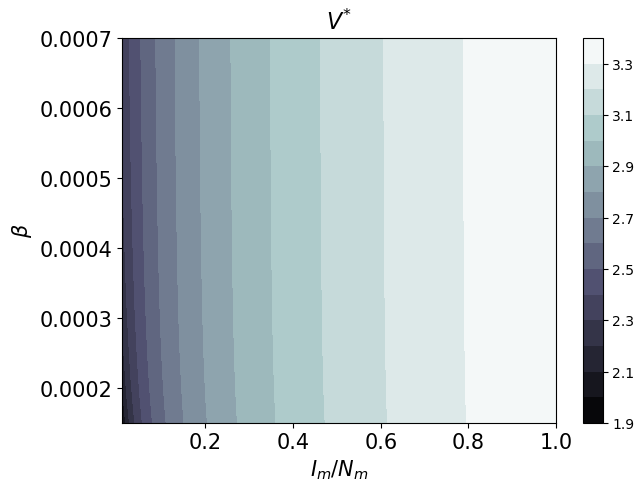

In [3]:
def VstarBeta(Im_range, beta_range, x, a):
    """Creates a 2D-mest for Vstar: 
    Im_range = range for the infected mosquito population,
    beta_range= range for the parameter of interest (betaWB),
    x = fixed parameters of the within-host model"""
    # Creating 2-D grid of ranges 
    [gB, BETA] = np.meshgrid(Im_range, beta_range) 

    L_T, betaWB, d, k, delta, p ,c = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    V = 0.5*((d/BETA)*(p*k*BETA*L_T/(c*(k+d)*delta*d)-1) + a*gB/c + 
                 np.sqrt(((d/BETA)*(p*k*BETA*L_T/(c*(k+d)*delta*d)-1) + a*gB/c)**2 + 4*d*a*gB/(c*BETA)))
    return gB, BETA, V



# ranges of interest
ImNm_range = np.linspace(0.01, 1, 100) #range mosquito prevalence
beta_range = np.linspace(1.5e-4, 7e-4, 100) # range beta

gB, BETA, V = VstarBeta(ImNm_range, beta_range, paramsWNV, 1e5)

# plots filled contour plot 
fig1, ax = plt.subplots(figsize=(7,5), ncols=1, nrows=1) 
CS = ax.contourf(gB, BETA, np.log10(V), 15, cmap=plt.cm.bone) 
#ax.clabel(CS, inline=True, fontsize=15)
ax.set_title(r'$V^{*}$', fontsize=16)
ax.set_xlabel(r'$I_m/N_m$', fontsize=15)
ax.set_ylabel(r'$\beta$', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel(r'$R_0$', fontsize=25)

#plt.savefig("R0_contour.pdf", bbox_inches = 'tight')
plt.show()

### Code chunk 3: The endemic equilibrium 
but this time as a function of $g_H$ and the within-host reproduction number $R_h$
to achieve this, I substituted $\beta_{WH}=c(k+d)\delta dR_{w}/pk\Lambda_T$

In [4]:
def VstarR0(Im_range, R0_range, x, a):
    """Creates a 2D-mest for Vstar: 
    Im_range = range for infected mosquito population,
    R0_range= range for the parameter of interest (R0_range),
    x = fixed parameters of the within-host model"""
    # Creating 2-D grid of ranges 
    [gB, R0] = np.meshgrid(Im_range, R0_range) 

    L_T, betaWB, d, k, delta, p ,c = x[0], x[1], x[2], x[3], x[4], x[5], x[6]

    BETA = (c*(k+d)*delta*d*R0/(p*k*L_T))

    V = 0.5*((d/BETA)*(R0-1) + a*gB/c + np.sqrt(((d/BETA)*(R0-1) + a*gB/c)**2 + 4*d*a*gB/(c*BETA)))
    return gB, R0, V




Plots for each disease

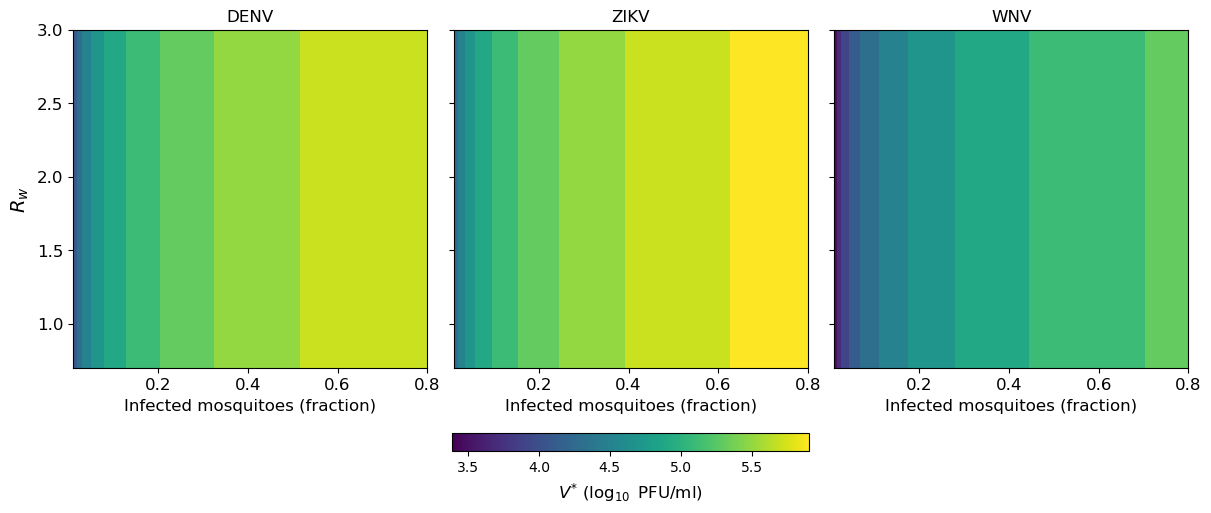

In [5]:
# Define the ranges of interest
ImNm_range = np.linspace(0.01, 0.8, 100) #range mosquito prevalence
R0_range = np.linspace(0.7, 3, 100) # range Rw


# Solve the equilibrium value
# DENV
gBd, R0d, Vd = VstarR0(ImNm_range, R0_range, paramsDENV, 1e7)

# ZIKV
gBz, R0z, Vz = VstarR0(ImNm_range, R0_range, paramsZIKV, 1e7)

# WNV
gBw, R0w, Vw = VstarR0(ImNm_range, R0_range, paramsWNV, 1e7)


from matplotlib.colors import Normalize
import matplotlib.cm as cm
# Common normalization across all plots
all_vals = np.log10(np.concatenate([Vd.flatten(), Vz.flatten(), Vw.flatten()]))
vmin = np.min(all_vals)
vmax = np.max(all_vals)
norm = Normalize(vmin=vmin, vmax=vmax)

# Define color maps for each virus
#cmap_list = [plt.cm.YlGn, plt.cm.Blues, plt.cm.Reds]

# Plotting
fig1, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 5), ncols=3, sharey=True, constrained_layout=True)

# DENV
cf1 = ax1.contourf(gBd, R0d, np.log10(Vd), levels=10, cmap='viridis', norm=norm)
ax1.set_title(r'DENV', fontsize=12)
ax1.set_xlabel('Infected mosquitoes (fraction)', fontsize=12)
ax1.set_ylabel(r'$R_w$', fontsize=14)
ax1.tick_params(labelsize=12)

# ZIKV
cf2 = ax2.contourf(gBz, R0z, np.log10(Vz), levels=10, cmap='viridis', norm=norm)
ax2.set_title(r'ZIKV', fontsize=12)
ax2.set_xlabel('Infected mosquitoes (fraction)', fontsize=12)
ax2.tick_params(labelsize=12)

# WNV
cf3 = ax3.contourf(gBw, R0w, np.log10(Vw), levels=10, cmap='viridis', norm=norm)
ax3.set_title(r'WNV', fontsize=12)
ax3.set_xlabel('Infected mosquitoes (fraction)', fontsize=12)
ax3.tick_params(labelsize=12)

# Create a single colorbar for all three plots
# Use the last contourf's ScalarMappable as reference (they all share same norm)
cbar = fig1.colorbar(cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis), ax=[ax1, ax2, ax3], orientation='horizontal', shrink=0.32)
cbar.set_label(r'$V^{*}$ ($\log_{10}$ PFU/ml)', fontsize=12)

#plt.savefig("Vstar.pdf", bbox_inches = 'tight')
plt.show()

## Code chunk: Sensitivity analysis
First, import the required libraries

In [6]:
from SALib.sample.sobol import sample
from SALib.analyze.sobol import analyze

First, define the quantity of interest i.e. $V^{*}$ (without depending on $g_H$) in terms of the parameters which will vary in the sensitivity exploration.

\begin{equation}
V^{*} = \dfrac{d}{\beta_{WH}}(R_{w} -1)
\end{equation}

In [7]:
# First we define Rw as function of the parameters
def Rw(x):
    """ This function receives the within-host parameters and returns Rw"""
    L_T, betaWH, d, k, delta, p ,c = x[0], x[1], x[2], x[3], x[4], x[5], x[6]

    Rw = p*k*betaWH*L_T/(c*(k+d)*delta*d)
    return Rw


def Vstar(x):
    """ This function receives the within-host parameters x and returns Vstar"""
    L_T, betaWH, d, k, delta, p ,c = x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    V = d*(Rw(x)-1)/betaWH
    return V




Next compute the Sobol indices

In [8]:
#-define a function to evaluate the values of the parameters 
     
def evaluate(values):
    Y = np.zeros([values.shape[0]])
    for i, X in enumerate(values):
        Y[i] = Vstar(X)
    return Y



# Dengue virus
boundsDENV = [[300, 900],[5e-5, 1.5e-4],[0.015, 0.045],[2, 6], [1.25, 3.75], [25, 75], [6, 20]]


# Zika virus
boundsZIKV = [[80, 240],[1e-5, 3e-5],[0.015, 0.045],[2, 6], [1.75, 5.25], [500, 1500], [5, 15]]

# West-nile virus
boundsWNV = [[2010, 6030],[2e-4, 6e-4],[0.015, 0.045], [1.5, 4.5], [12, 34], [28, 86], [21, 67]]




def problemRanges(ParamsBounds):
    problem = {
        'num_vars': 7,  
        'names': np.array(['L_T', 'betaWH', 'd','k','delta', 'p', 'c']), 
        'bounds': ParamsBounds
    }
    return problem
    


# ------------Generate samples

number_of_samples = 2**14 # Note this value should be above 2**n where n is the number of parameters

param_valuesDENV = sample(problemRanges(boundsDENV), number_of_samples, calc_second_order=True)
param_valuesZIKV = sample(problemRanges(boundsZIKV), number_of_samples, calc_second_order=True)
param_valuesWNV = sample(problemRanges(boundsWNV), number_of_samples, calc_second_order=True)


# ------------Run model (example)

Ydenv = evaluate(param_valuesDENV)
Yzikv = evaluate(param_valuesZIKV)
Ywnv = evaluate(param_valuesWNV)


# ------------Perform analysis
Si_denv = analyze(problemRanges(boundsDENV), Ydenv, print_to_console=False)
Si_zikv = analyze(problemRanges(boundsZIKV), Yzikv, print_to_console=False)
Si_wnv = analyze(problemRanges(boundsWNV), Ywnv, print_to_console=False)


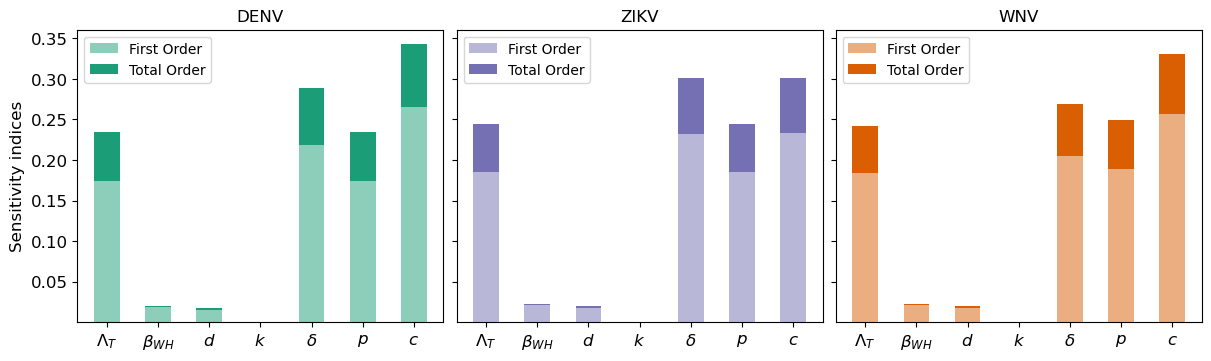

In [9]:
#---------------------- Bar plot for the Sobol indices


fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,3.5), ncols=3, nrows=1, sharey=True, constrained_layout=True)


ind = np.arange(len(Si_denv['S1']))   # the x locations for the groups
width = 0.5 
param_names = np.array([r'$\Lambda_T$', r'$\beta_{WH}$', r'$d$', r'$k$', r'$\delta$', r'$p$', r'$c$'])

#--------------------------------------------- DENV

p1_denv = ax1.bar(ind, Si_denv['S1'], width, align='center', color='#1b9e77', alpha=0.5)
p2_denv = ax1.bar(ind, Si_denv['ST']-Si_denv['S1'], width, align='center', bottom=Si_denv['S1'], color='#1b9e77')

ax1.set_ylabel('Sensitivity indices', fontsize=12)
ax1.set_title(r'DENV')
ax1.set_xticks(ind)
ax1.set_xticklabels(param_names, fontsize=12)
ax1.legend((p1_denv[0], p2_denv[0]), ('First Order', 'Total Order'), loc='best')
ax1.tick_params(labelsize=12)


# --------------------------------------------ZIKV

p1_zikv = ax2.bar(ind, Si_zikv['S1'], width, align='center', color='#7570b3', alpha=0.5)
p2_zikv = ax2.bar(ind, Si_zikv['ST']-Si_zikv['S1'], width, align='center', bottom=Si_zikv['S1'], color='#7570b3')


ax2.set_title(r'ZIKV')
ax2.set_xticks(ind)
ax2.set_xticklabels(param_names, fontsize=12)
ax2.legend((p1_zikv[0], p2_zikv[0]), ('First Order', 'Total Order'), loc='best')
ax2.tick_params(labelsize=12)

# --------------------------------------------WNV

p1_wnv = ax3.bar(ind, Si_wnv['S1'], width, align='center', color='#d95f02', alpha=0.5)
p2_wnv = ax3.bar(ind, Si_wnv['ST']-Si_wnv['S1'], width, align='center', bottom=Si_wnv['S1'], color='#d95f02')


ax3.set_title(r'WNV')
ax3.set_xticks(ind)
ax3.set_xticklabels(param_names, fontsize=12)
ax3.legend((p1_wnv[0], p2_wnv[0]), ('First Order', 'Total Order'), loc='best')
ax3.tick_params(labelsize=12)
#plt.savefig("Sobol_V.pdf", bbox_inches = 'tight')


plt.show()